In [13]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import signal
from time import sleep
from IPython.display import display, clear_output

def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

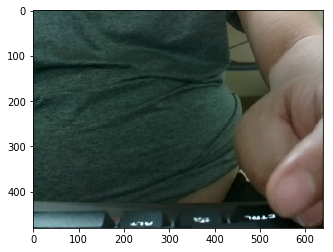

In [18]:
vc = cv2.VideoCapture(0)

fig = plt.figure()
ax = fig.gca()
fig.show()
#plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False
pass

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    plt.imshow(frame)
    clear_output(wait = True)
    plt.pause(0.5)
    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    pass

    if is_interrupted:
        vc.release() 
        break
    pass
pass